# Day 13. Task 04
# Переобучение

## 0. Импорты

In [168]:
import pandas as pd

## 1. Препроцессинг

**1. Загрузите файл `dayofweek.csv` в датафрейм.**

In [169]:
df = pd.read_csv('../data/dayofweek.csv')
df

,numTrials,hour,dayofweek,user_0,user_1,user_10,user_11,user_12,user_13,user_14,...,lab02,lab03,lab03s,lab05s,laba04,laba04s,laba05,laba06,laba06s,project1
0,-0.788667,-2.562352,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,-0.756764,-2.562352,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,-0.724861,-2.562352,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,-0.692958,-2.562352,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,-0.661055,-2.562352,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,-0.533442,0.945382,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1682,-0.629151,0.945382,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1683,-0.597248,0.945382,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1684,-0.565345,0.945382,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [170]:
X = df.drop(columns='dayofweek')
y = df.dayofweek

**2. Воспользуйтесь `train_test_split` с параметрами `test_size=0.2`, `random_state=21` и получите `X_train`, `y_train`, `X_test`, `y_test`.**

- [Примеры разделения датасета на train и test c Scikit-learn](https://pythonru.com/baza-znanij/sklearn-train-test-split)

In [171]:
from sklearn.model_selection import train_test_split

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=21)

**3. Проверьте, что распределение классов получилось примерно похожим в обучающей и тестовой выборке, воспользовавшись, например, методом `value_counts()`.**

- [pandas.Series.value_counts](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html)

- [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [173]:
y_train.value_counts(normalize=True)

3    0.232196
6    0.212908
1    0.164688
5    0.160237
2    0.092730
0    0.077893
4    0.059347
Name: dayofweek, dtype: float64

In [174]:
y_test.value_counts(normalize=True)

3    0.245562
6    0.204142
5    0.162722
1    0.153846
0    0.091716
4    0.071006
2    0.071006
Name: dayofweek, dtype: float64

**4. Воспользуйтесь дополнительным параметров `stratify=` и проверьте распределения снова. Теперь уже точно они должны быть плюс-минус одинаковыми.**

- [Параметр "стратифицировать" из метода "train test split" (scikit Learn)](https://askdev.ru/q/parametr-stratificirovat-iz-metoda-train-test-split-scikit-learn-96827/)

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y,
                                                    test_size=0.2, 
                                                    random_state=21)

In [176]:
y_train.value_counts(normalize=True)

3    0.234421
6    0.211424
1    0.162463
5    0.160979
2    0.088279
0    0.080861
4    0.061573
Name: dayofweek, dtype: float64

In [177]:
y_test.value_counts(normalize=True)

3    0.236686
6    0.210059
1    0.162722
5    0.159763
2    0.088757
0    0.079882
4    0.062130
Name: dayofweek, dtype: float64

## 2. Baseline-модели

**1. Обучите точно такие же baseline-модели, что и в предыдущем задании, и посчитайте accuracy на тестовой выборке со стратификацией.**

### a. Logreg

In [178]:
from sklearn.linear_model import LogisticRegression

In [179]:
logreg = LogisticRegression(random_state=21, 
                            fit_intercept=False,
                            solver='liblinear').fit(X_train, y_train)

In [180]:
logreg.score(X_test, y_test)

0.6153846153846154

### b. SVM

In [181]:
from sklearn.svm import SVC

In [182]:
svc = SVC(kernel='linear', probability=True, random_state=21).fit(X_train, y_train)

In [183]:
svc.score(X_test, y_test)

0.7159763313609467

### c. Decision tree

In [184]:
from sklearn.tree import DecisionTreeClassifier

In [185]:
dtc = DecisionTreeClassifier(max_depth=4, random_state=21).fit(X_train, y_train)

In [186]:
dtc.score(X_test, y_test)

0.5295857988165681

### d. Random forest

In [187]:
from sklearn.ensemble import RandomForestClassifier

In [188]:
rfc = RandomForestClassifier(n_estimators=100, max_depth = 25, random_state=21).fit(X_train, y_train)

In [189]:
rfc.score(X_test, y_test)

0.9289940828402367

**2. Построенные модели продемонстрировали те же значения метрики? Какая из моделей показала самую большую разницу между тем, что получилось в прошлом задании и в этом задании? Запишите ответ в markdown-ячейку в конце этой секции.**

**ОТВЕТ:**

   Построенные модели продемонстрировали те же значения метрики? 
   
   - **"Нет"**
    
   Какая из моделей показала самую большую разницу между тем, что получилось в прошлом задании и в этом задании?
   
   
   - **"Random forest (Случайный лес)"**
   
    
    (Logreg:        0.6153846153846154 - 0.6215895610913404 = -0.006204945706725029
    
     SVС:           0.7159763313609467 - 0.702846975088968  =  0.013129356271978754
     
     Decision tree: 0.5295857988165681 - 0.5516014234875445 = -0.022015624670976397
     
     Random forest: 0.9289940828402367 - 1.0                = -0.07100591715976334)
    

## 3. Кросс-валидация

Мы могли бы продолжать играться дальше с гиперпараметрами моделей, чтобы достичь более высокого accuracy на тестовом датасете, но это плохая практика. Она ведет нас снова к переобучению. Тестовый датасет нужен только для того, чтобы проверить качество уже финальной модели.

Но существуют другие способы решения этой проблемы – кросс-валидация. Она не использует тестовый датасет, а временно создает валидационную выборку из обучающего датасета. Так происходит несколько раз. 

Опять же, существуют разные способы реализации, но общий принцип в том, что именно валидационная выборка используется для оптимизации гиперпараметров, а не тестовая.

1. Используя `cross_val_score` с параметром `cv=10`, посчитайте среднее accuracy и его среднее квадратическое отклонение для каждой модели, которую вы построили ранее (логрегрессия с `solver='liblinear'`, SVC, дерево классификации, случайный лес).

- [sklearn.model_selection.cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

In [190]:
from sklearn.model_selection import cross_val_score

### a. Logreg

In [191]:
cross_logreg = cross_val_score(logreg, X, y, cv=10)

In [192]:
print('accuracy среднее = ', cross_logreg.mean())

accuracy среднее =  0.45291983657368284


In [193]:
print('accuracy среднее квадратическое отклонение = ', cross_logreg.std())

accuracy среднее квадратическое отклонение =  0.16960708432126997


### b. SVM

In [194]:
cross_svc = cross_val_score(svc, X, y, cv=10)

In [195]:
print('accuracy среднее = ', cross_svc.mean())

accuracy среднее =  0.5051986475063398


In [196]:
print('accuracy среднее квадратическое отклонение = ', cross_svc.std())

accuracy среднее квадратическое отклонение =  0.15857963555262297


### c. Decision tree

In [197]:
cross_dtc = cross_val_score(dtc, X, y, cv=10)

In [198]:
print('accuracy среднее = ', cross_dtc .mean())

accuracy среднее =  0.3883523527754297


In [199]:
print('accuracy среднее квадратическое отклонение = ', cross_dtc .std())

accuracy среднее квадратическое отклонение =  0.11835394295385691


### d. Random forest

In [200]:
cross_rfc = cross_val_score(rfc, X, y, cv=10)

In [201]:
print('accuracy среднее = ', cross_rfc .mean())

accuracy среднее =  0.6607847280924204


In [202]:
print('accuracy среднее квадратическое отклонение = ', cross_rfc .std())

accuracy среднее квадратическое отклонение =  0.17462799234675505


## 4. Оптимизация

**1. Выберите лучший алгоритм и поиграйтесь еще с параметрами, по-прежнему пользуясь кросс-валидацией. Найдите наилучшую комбинацию параметров.**

- [sklearn.model_selection.GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

In [203]:
from sklearn.model_selection import GridSearchCV

In [204]:
parameter = {'n_estimators': list(range(10,120,50)),
             'max_depth': list(range(20,50,5))}

In [205]:
rfc_param = GridSearchCV(RandomForestClassifier(random_state=21), param_grid=parameter).fit(X_train, y_train)

In [206]:
rfc_param.best_params_

{'max_depth': 40, 'n_estimators': 60}

In [207]:
rfc_best = RandomForestClassifier(n_estimators=60, max_depth = 40, random_state=21).fit(X_train, y_train)

In [208]:
cross_rfc_best = cross_val_score(rfc_best, X, y, cv=10)

**2. Посчитайте accuracy для этой финальной модели уже на тестовом датасете.**

In [209]:
rfc_best.score(X_test, y_test)

0.9378698224852071

**3. Нарисуйте график с топ-10 наиболее важными признаками модели.**

In [210]:
import matplotlib.pyplot as plt

In [211]:
rfc_coef = pd.Series(rfc_best.feature_importances_, index=rfc_best.feature_names_in_) \
                        .sort_values(ascending=False)
#rfc_coef

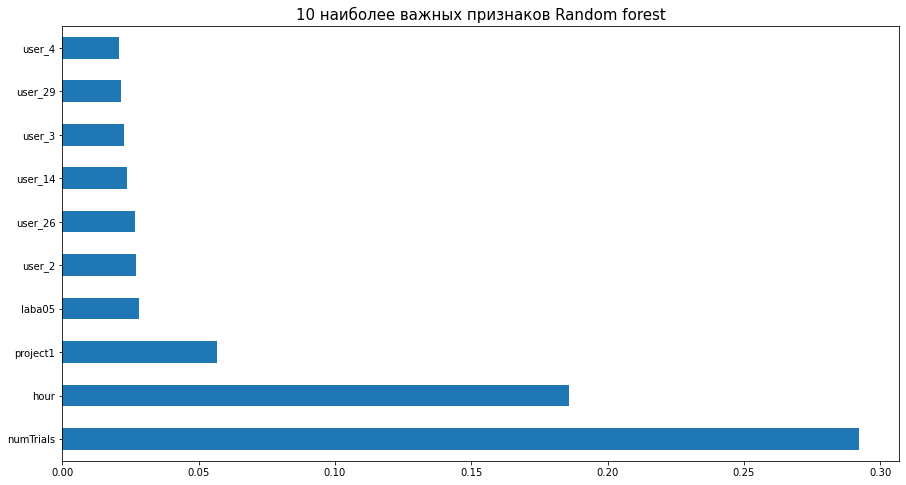

In [212]:
rfc_coef[0:10].plot.barh(figsize= (15, 8))
plt.title('10 наиболее важных признаков Random forest', fontsize=15)
plt.show()

**4. Сохраните модель, используя `joblib`.**

- [scikit-learn: Сохранение и восстановление моделей](https://rukovodstvo.net/posts/id_1322/)

- [ImportError: не удается импортировать имя joblib из 'sklearn.externals'](https://stackoverflow.com/questions/61893719/importerror-cannot-import-name-joblib-from-sklearn-externals)

In [213]:
#from sklearn.externals import joblib
import joblib

In [214]:
# Сохранить в файл в data
joblib_file = "../data/rfc_best_model.pkl" 
joblib.dump(rfc_best, joblib_file)

['../data/rfc_best_model.pkl']

**5. Загузите модель из файла. Сделайте прогноз для тестового датасета снова и посчитайте accuracy.**

In [215]:
# Загрузить из файла
joblib_model = joblib.load(joblib_file) 

In [216]:
# Расчет точности и прогнозов
score = joblib_model.score(X_test, y_test) 
print("Test score: {0:.2f} %".format(100 * score))

Test score: 93.79 %
